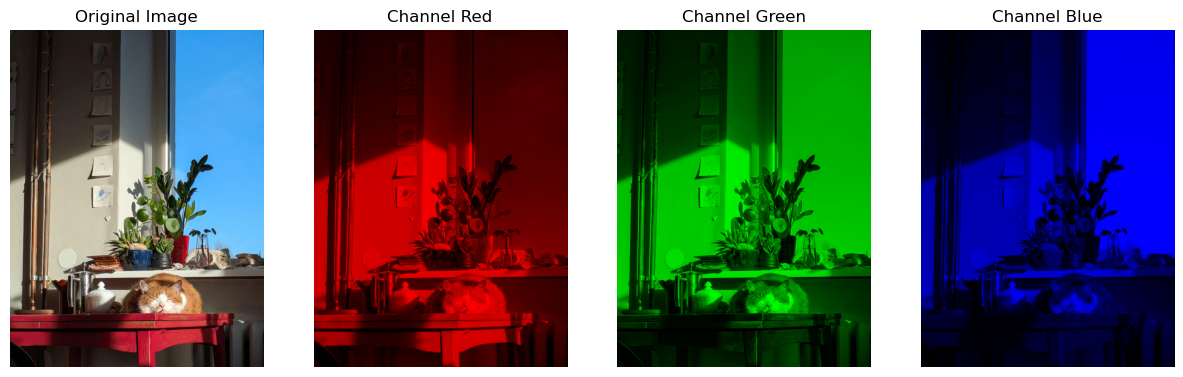

In [115]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image

og_image = cv2.imread('../../assets/resting_cat.jpg')

imgRatio = og_image.shape[1] / og_image.shape[0]

# Convert the image from BGR to RGB format
image = cv2.cvtColor(cv2.resize(og_image, (0,0), fx=0.2, fy=0.2), cv2.COLOR_BGR2RGB)

#figure sizing
plt.gcf().set_size_inches(5*imgRatio*4, 5)

ax = plt.subplot(141)
ax.set_title('Original Image')
ax.axis('off')
ax.imshow(image)

channels = ['Red', 'Green', 'Blue']

for i in range(3):
  image_channel = image.copy()

  image_channel[:, :, (i + 1) % 3] = 0
  image_channel[:, :, (i + 2) % 3] = 0

  # Display the modified image
  ax = plt.subplot(1, 4, i + 2)
  ax.set_title(f'Channel {channels[i]}')
  ax.axis('off')
  ax.imshow(image_channel)


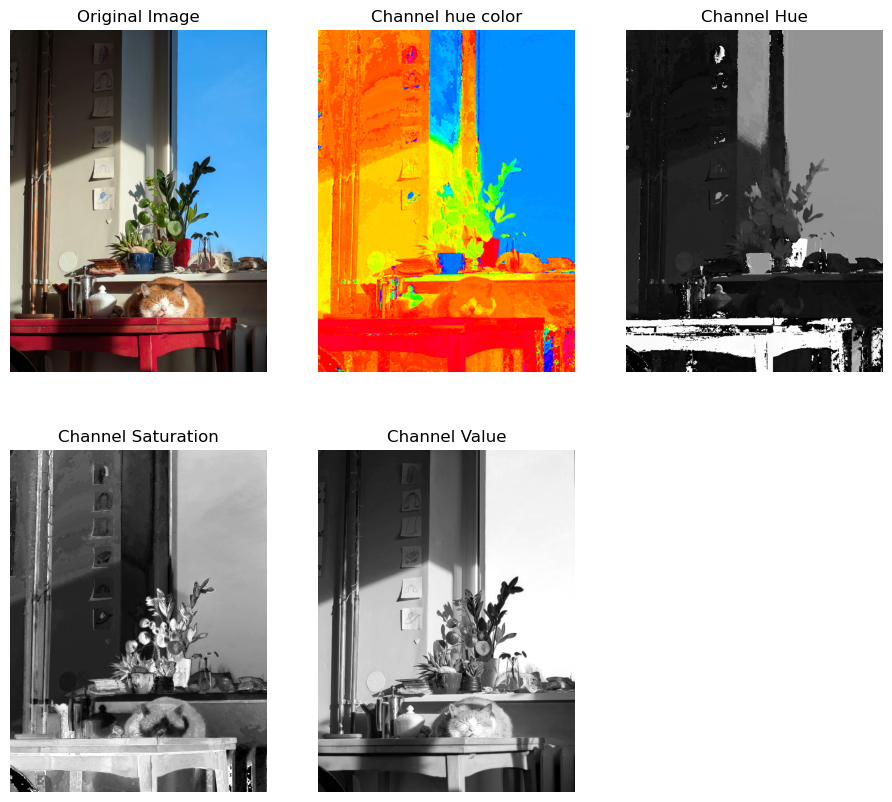

In [116]:

#figure sizing
plt.gcf().set_size_inches(5*imgRatio*3, 5*2)

ax = plt.subplot(231)
ax.set_title('Original Image')
ax.axis('off')
ax.imshow(image)

image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
channels = ['Hue', 'Saturation', 'Value']

image_channel = image_hsv.copy()
image_channel[:, :, 1] = 255
image_channel[:, :, 2] = 255
image_channel = cv2.cvtColor(image_channel, cv2.COLOR_HSV2RGB)

ax = plt.subplot(232)
ax.set_title(f'Channel hue color')
ax.axis('off')
ax.imshow(image_channel)

for i in range(3):
  image_channel = image_hsv[:, :, i]

  # Display the modified image
  ax = plt.subplot(2, 3, i + 3)
  ax.set_title(f'Channel {channels[i]}')
  ax.axis('off')
  ax.imshow(image_channel, cmap='gray')

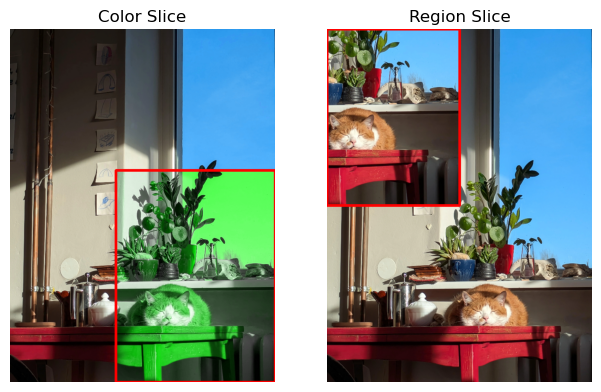

In [117]:
color_slice_hsv = image_hsv.copy()
im_region_slice = image.copy()

x_slice = ( 4*color_slice_hsv.shape[1]//10, 10*color_slice_hsv.shape[1]//10 )
y_slice = ( 4*color_slice_hsv.shape[0]//10, 10*color_slice_hsv.shape[0]//10 )

color_slice_hsv[y_slice[0]:y_slice[1], x_slice[0]:x_slice[1], 0] = 60
color_slice_hsv = cv2.rectangle(color_slice_hsv, (x_slice[0], y_slice[0]), (x_slice[1], y_slice[1]), (0, 255, 255), 5)

region_width = 5

x_slice = ( 0, region_width*color_slice_hsv.shape[1]//10 )
y_slice = ( 0, region_width*color_slice_hsv.shape[0]//10 )

x_slice_2 = np.add(x_slice, (color_slice_hsv.shape[1]//2, color_slice_hsv.shape[1]//2))
y_slice_2 = np.add(y_slice, (color_slice_hsv.shape[0]//2, color_slice_hsv.shape[0]//2))

region = im_region_slice[y_slice_2[0]:y_slice_2[1], x_slice_2[0]:x_slice_2[1], :]

im_region_slice[y_slice[0]:y_slice[1], x_slice[0]:x_slice[1], :] = region
im_region_slice = cv2.rectangle(im_region_slice, (x_slice[0], y_slice[0]), (x_slice[1], y_slice[1]), (255, 0, 0), 5)

plt.gcf().set_size_inches(5*imgRatio*2, 5)

ax = plt.subplot(121)
ax.set_title('Color Slice')
ax.axis('off')
ax.imshow(cv2.cvtColor(color_slice_hsv, cv2.COLOR_HSV2RGB))

ax = plt.subplot(122)
ax.set_title('Region Slice')
ax.axis('off')
ax.imshow(im_region_slice)

plt.show()


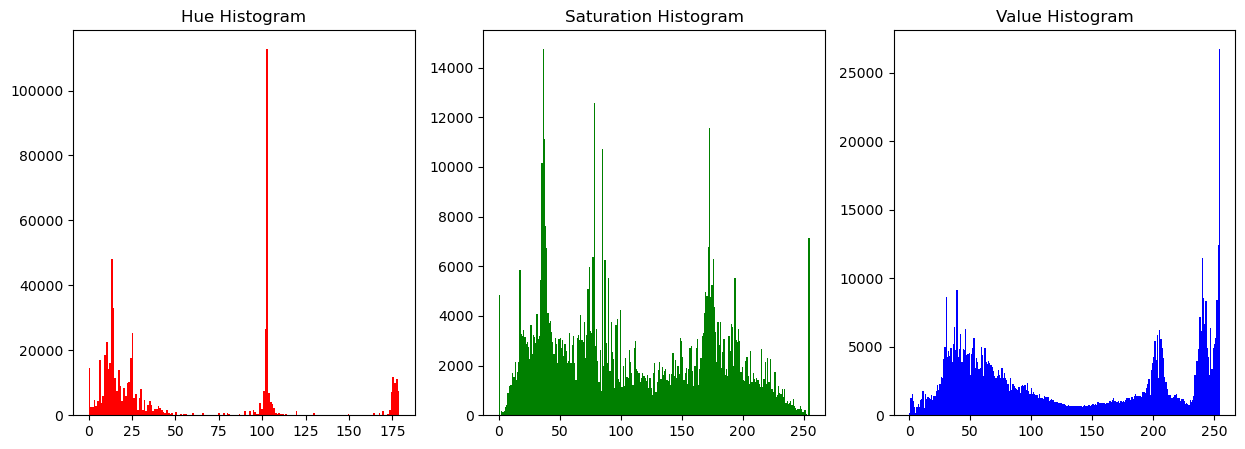

In [118]:
plt.gcf().set_size_inches(15,5)

ax = plt.subplot(131)
ax.set_title('Hue Histogram')
ax.hist(image_hsv[:, :, 0].ravel(), bins=180, color='r')

ax = plt.subplot(132)
ax.set_title('Saturation Histogram')
ax.hist(image_hsv[:, :, 1].ravel(), bins=256, color='g')

ax = plt.subplot(133)
ax.set_title('Value Histogram')
ax.hist(image_hsv[:, :, 2].ravel(), bins=256, color='b')
plt.show()


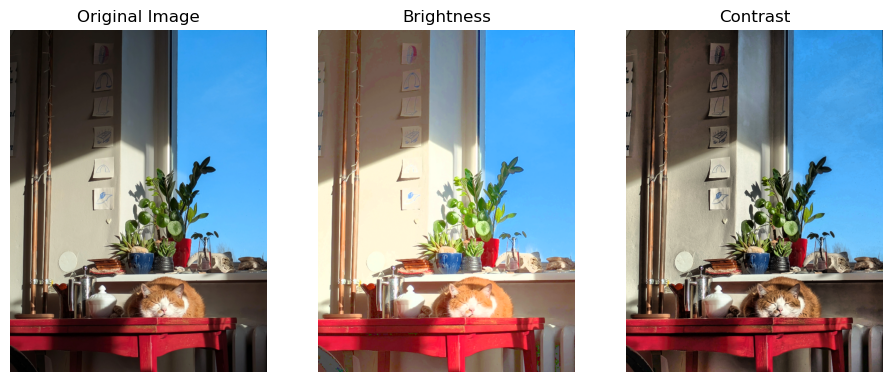

In [121]:
brightness_hsv = image_hsv.copy()
contrast_hsv = image_hsv.copy()

brightness_hsv[:, :, 2] = cv2.convertScaleAbs(image_hsv[:, :, 2], alpha=1, beta=75)


v_channel = contrast_hsv[:, :, 2]

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe_v = clahe.apply(v_channel)

contrast_hsv[:, :, 2] = clahe_v

plt.gcf().set_size_inches(5*imgRatio*3, 5)

ax = plt.subplot(131)
ax.set_title('Original Image')
ax.axis('off')
ax.imshow(image)

ax = plt.subplot(132)
ax.set_title('Brightness')
ax.axis('off')
ax.imshow(cv2.cvtColor(brightness_hsv, cv2.COLOR_HSV2RGB))

ax = plt.subplot(133)
ax.set_title('Contrast')
ax.axis('off')
ax.imshow(cv2.cvtColor(contrast_hsv, cv2.COLOR_HSV2RGB))

plt.show()